In [45]:
import pandas as pd
import numpy as np

In [46]:
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
cols = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]

for i in cols:
    print(data[i].value_counts())
    print("______________________________________________________")

Survived
0    549
1    342
Name: count, dtype: int64
______________________________________________________
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
______________________________________________________
Sex
male      577
female    314
Name: count, dtype: int64
______________________________________________________
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
______________________________________________________
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
______________________________________________________
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
______________________________________________________


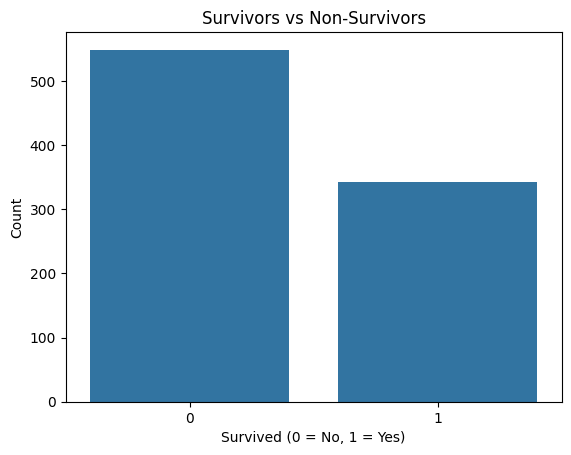

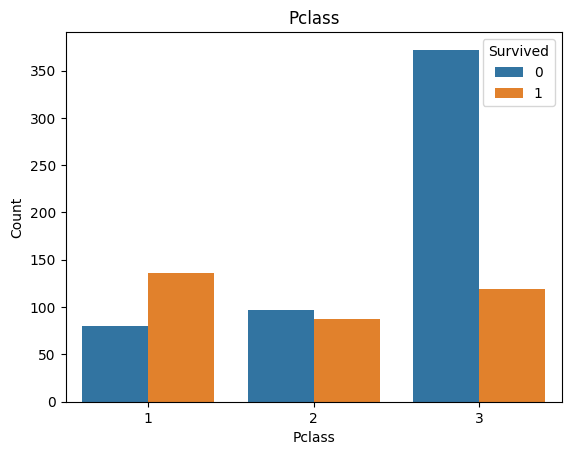

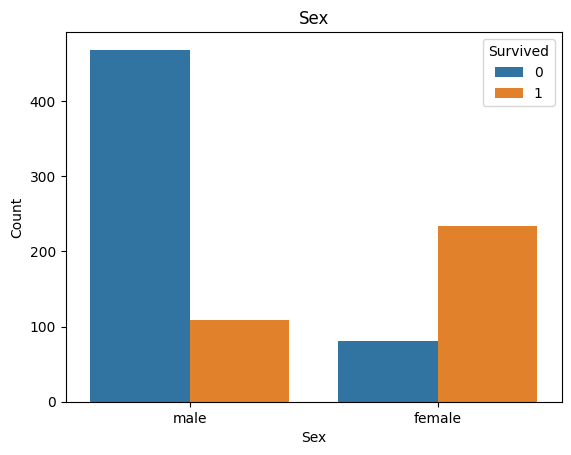

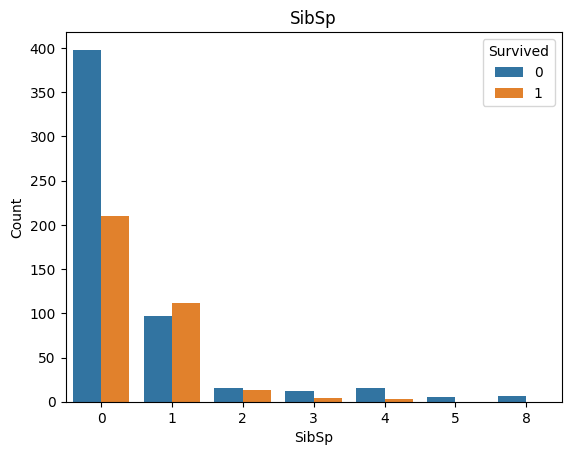

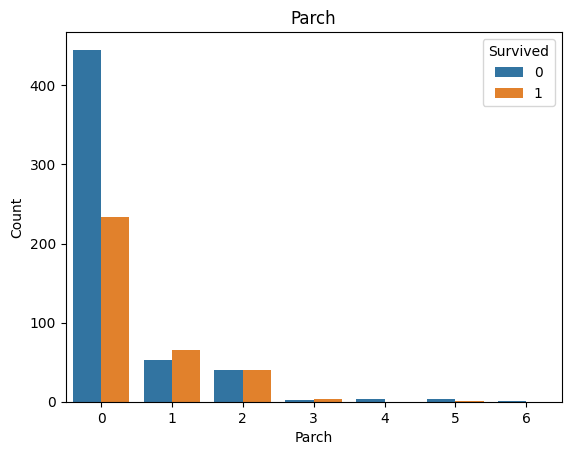

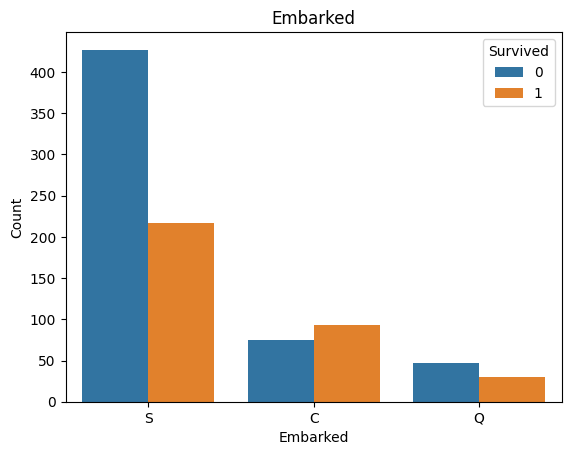

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=data)
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Survivors vs Non-Survivors')
plt.show()

new_cols = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

for i in new_cols:
    sns.countplot(x=f'{i}', data=data, hue="Survived")
    plt.xlabel(f'{i}')
    plt.ylabel('Count')
    plt.title(f'{i}')
    plt.show()



array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

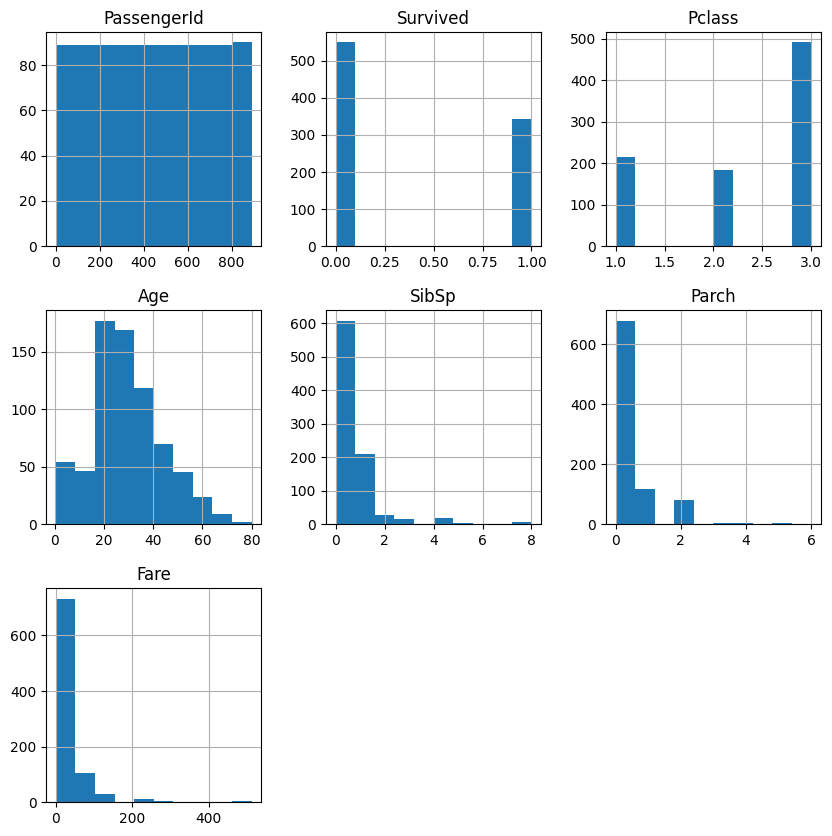

In [51]:
data[data.columns].hist(figsize=(10,10))

In [52]:
def get_title(name):
    for part in name.split():
        if '.' in part:
            return part
    return ''

data["Title"] = data["Name"].apply(get_title)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [53]:
data = data.drop("Name", axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [54]:
data = data.drop("PassengerId", axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr.


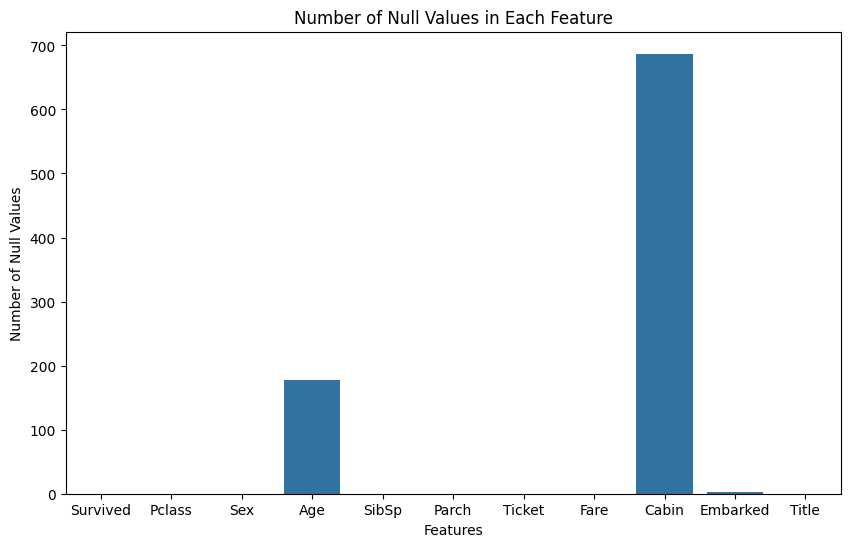

In [55]:
null_counts = data.isnull().sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.xlabel('Features')
plt.ylabel('Number of Null Values')
plt.title('Number of Null Values in Each Feature')
plt.show()

In [56]:
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode())

In [57]:
data["Age"] = data["Age"].fillna(data["Age"].median())

In [58]:
data['Cabin_Letter'] = data['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else None)

In [59]:
data["Ticket"].nunique()

681

In [60]:
def get_ticket_prefix(ticket):
    parts = ticket.split()
    
    for part in parts:
        if contains_letters(part):
            return part
        elif contains_dot_or_slash(part):
            return part
    
    return None

def contains_letters(text):
    for char in text:
        if char.isalpha():
            return True
    return False

def contains_dot_or_slash(text):
    for char in text:
        if char == '.' or char == '/':
            return True
    return False

data['Ticket_Prefix'] = data['Ticket'].apply(get_ticket_prefix)


In [61]:
data['Ticket_Prefix'].value_counts()

Ticket_Prefix
PC            60
C.A.          27
STON/O        12
A/5           10
W./C.          9
CA.            8
SOTON/O.Q.     8
A/5.           7
SOTON/OQ       7
STON/O2.       6
CA             6
F.C.C.         5
C              5
SC/PARIS       5
S.O.C.         5
SC/Paris       4
LINE           4
A/4            3
PP             3
A/4.           3
S.O./P.P.      3
SC/AH          3
A.5.           2
A./5.          2
P/PP           2
WE/P           2
SOTON/O2       2
S.C./PARIS     2
S.W./PP        1
F.C.           1
A/S            1
SO/C           1
W/C            1
SC             1
SCO/W          1
SW/PP          1
Fa             1
S.O.P.         1
S.C./A.4.      1
A4.            1
S.P.           1
W.E.P.         1
C.A./SOTON     1
Name: count, dtype: int64

In [62]:
null_count = data['Ticket_Prefix'].isnull().sum()
print(f'The number of None/NaN values in Ticket_Prefix is: {null_count}')


The number of None/NaN values in Ticket_Prefix is: 661


In [63]:
data.drop("Ticket", axis=1, inplace=True)
data.drop("Cabin", axis=1, inplace=True)

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_Letter,Ticket_Prefix
0,0,3,male,22.0,1,0,7.2500,S,Mr.,None,A/5
1,1,1,female,38.0,1,0,71.2833,C,Mrs.,C,PC
2,1,3,female,26.0,0,0,7.9250,S,Miss.,None,STON/O2.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.,C,None
4,0,3,male,35.0,0,0,8.0500,S,Mr.,None,None


In [64]:
data["Ticket_Prefix"] = data["Ticket_Prefix"].fillna("Unknown")
data["Ticket_Prefix"].value_counts()

Ticket_Prefix
Unknown       661
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
A/5.            7
SOTON/OQ        7
STON/O2.        6
CA              6
F.C.C.          5
C               5
SC/PARIS        5
S.O.C.          5
SC/Paris        4
LINE            4
A/4             3
PP              3
A/4.            3
S.O./P.P.       3
SC/AH           3
A.5.            2
A./5.           2
P/PP            2
WE/P            2
SOTON/O2        2
S.C./PARIS      2
S.W./PP         1
F.C.            1
A/S             1
SO/C            1
W/C             1
SC              1
SCO/W           1
SW/PP           1
Fa              1
S.O.P.          1
S.C./A.4.       1
A4.             1
S.P.            1
W.E.P.          1
C.A./SOTON      1
Name: count, dtype: int64

In [65]:
data.groupby(["Ticket_Prefix"])[["Survived"]].mean()

,Survived
Ticket_Prefix,
A./5.,0.000000
A.5.,0.000000
A/4,0.000000
A/4.,0.000000
A/5,0.100000
A/5.,0.142857
A/S,0.000000
A4.,0.000000
C,0.400000


In [66]:
prefix_counts = data["Ticket_Prefix"].value_counts()

data['Ticket_Prefix_Max'] = data['Ticket_Prefix'].apply(
    lambda x: x if prefix_counts[x] >= 5 else 'Other'
)
print(data['Ticket_Prefix_Max'].value_counts())

Ticket_Prefix_Max
Unknown       661
PC             60
Other          50
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
A/5.            7
SOTON/OQ        7
STON/O2.        6
CA              6
SC/PARIS        5
S.O.C.          5
C               5
F.C.C.          5
Name: count, dtype: int64


In [67]:
data.groupby(["Ticket_Prefix_Max"])[["Survived"]].mean()

,Survived
Ticket_Prefix_Max,
A/5,0.100000
A/5.,0.142857
C,0.400000
C.A.,0.481481
CA,0.000000
CA.,0.125000
F.C.C.,0.800000
Other,0.280000
PC,0.650000


In [68]:
data.drop("Ticket_Prefix", axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_Letter,Ticket_Prefix_Max
0,0,3,male,22.0,1,0,7.2500,S,Mr.,None,A/5
1,1,1,female,38.0,1,0,71.2833,C,Mrs.,C,PC
2,1,3,female,26.0,0,0,7.9250,S,Miss.,None,STON/O2.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.,C,Unknown
4,0,3,male,35.0,0,0,8.0500,S,Mr.,None,Unknown


In [69]:
data["Cabin_Letter"] = data["Cabin_Letter"].fillna("Unknown")
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_Letter,Ticket_Prefix_Max
0,0,3,male,22.0,1,0,7.2500,S,Mr.,Unknown,A/5
1,1,1,female,38.0,1,0,71.2833,C,Mrs.,C,PC
2,1,3,female,26.0,0,0,7.9250,S,Miss.,Unknown,STON/O2.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.,C,Unknown
4,0,3,male,35.0,0,0,8.0500,S,Mr.,Unknown,Unknown


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

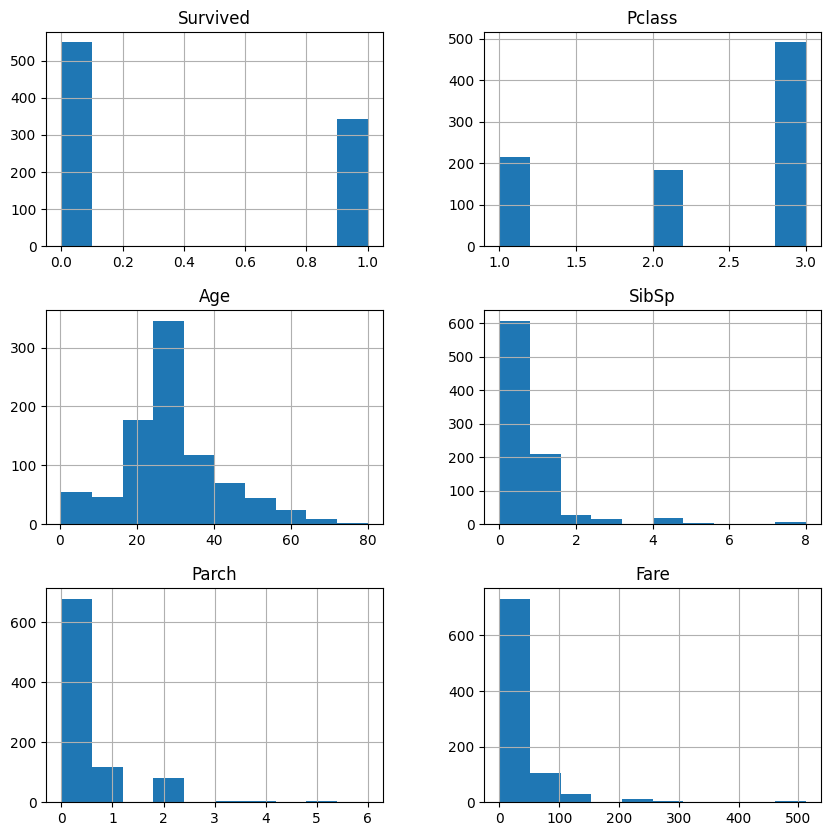

In [70]:
data[data.columns].hist(figsize=(10,10))

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

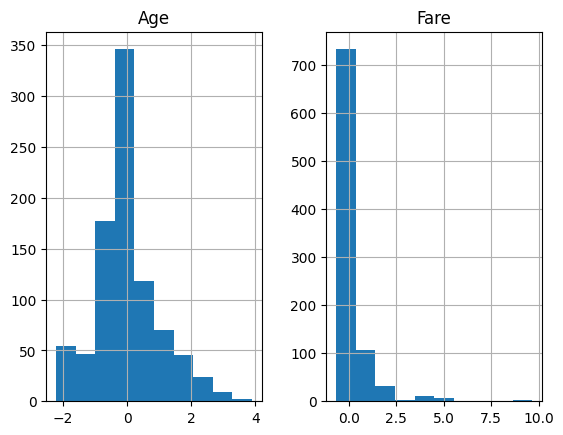

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

data[["Age", "Fare"]].hist()

In [72]:
from sklearn.preprocessing import LabelEncoder

data_xgb = data.copy()

# Label encode categorical features
label_encoders = {}
for col in ['Sex', 'Embarked', 'Title', 'Cabin_Letter', 'Ticket_Prefix_Max']:
    le = LabelEncoder()
    data_xgb[col] = le.fit_transform(data_xgb[col])
    label_encoders[col] = le


In [73]:
data_xgb.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_Letter,Ticket_Prefix_Max
0,0,3,1,-0.565736,1,0,-0.502445,2,12,8,0
1,1,1,0,0.663861,1,0,0.786845,0,13,2,8
2,1,3,0,-0.258337,0,0,-0.488854,2,9,8,14
3,1,1,0,0.433312,1,0,0.420730,2,13,2,15
4,0,3,1,0.433312,0,0,-0.486337,2,12,8,15


<Axes: >

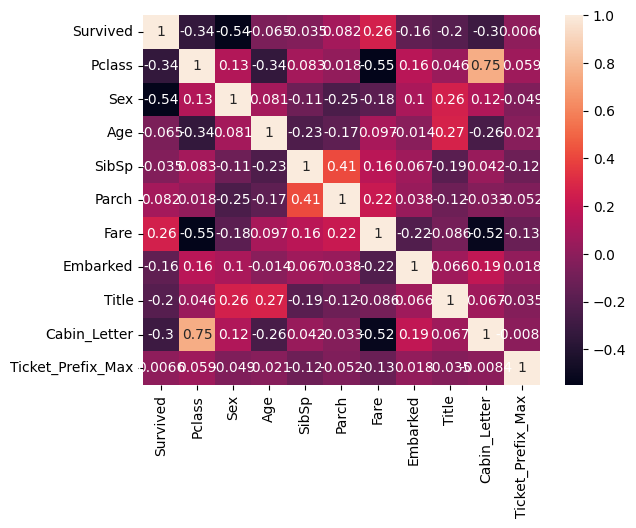

In [74]:
corr_matrix = data_xgb.corr()
sns.heatmap(corr_matrix, annot=True)

In [75]:
data_xgb.drop("Cabin_Letter", axis=1, inplace=True)
data_xgb.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Ticket_Prefix_Max
0,0,3,1,-0.565736,1,0,-0.502445,2,12,0
1,1,1,0,0.663861,1,0,0.786845,0,13,8
2,1,3,0,-0.258337,0,0,-0.488854,2,9,14
3,1,1,0,0.433312,1,0,0.420730,2,13,15
4,0,3,1,0.433312,0,0,-0.486337,2,12,15


In [76]:
from sklearn.model_selection import train_test_split

# Define features and target
X_xgb = data_xgb.drop('Survived', axis=1)
y = data_xgb['Survived']

# Split data (for final evaluation after GridSearchCV)
X_train_xgb, X_test_xgb, y_train, y_test = train_test_split(X_xgb, y, test_size=0.2, random_state=42)


from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define parameter grid
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available CPU cores
    verbose=1
)

# Fit GridSearchCV on training data
grid_search_xgb.fit(X_train_xgb, y_train)

# Best parameters and score
print(f"Best Parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_xgb.best_score_:.4f}")

# Evaluate on test set with best model
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_xgb)
print(f"XGBoost Test Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\naren\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [10:43:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}
Best Cross-Validation Accuracy: 0.8357
XGBoost Test Accuracy: 0.8101


In [78]:
X_test_xgb.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title',
       'Ticket_Prefix_Max'],
      dtype='object')

In [79]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [80]:
test_data.drop(["PassengerId", "Cabin"], axis=1, inplace=True)
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [81]:
def get_title(name):
    for part in name.split():
        if '.' in part:
            return part
    return ''

test_data["Title"] = test_data["Name"].apply(get_title)
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr.
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs.
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr.
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr.
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs.


In [82]:
test_data.drop("Name", axis=1, inplace=True)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,3,male,34.5,0,0,330911,7.8292,Q,Mr.
1,3,female,47.0,1,0,363272,7.0000,S,Mrs.
2,2,male,62.0,0,0,240276,9.6875,Q,Mr.
3,3,male,27.0,0,0,315154,8.6625,S,Mr.
4,3,female,22.0,1,1,3101298,12.2875,S,Mrs.


In [84]:
data_xgb["Title"].value_counts()

Title
12    517
9     182
13    125
8      40
4       7
15      6
10      2
7       2
1       2
2       1
0       1
14      1
16      1
6       1
11      1
3       1
5       1
Name: count, dtype: int64

<Axes: >

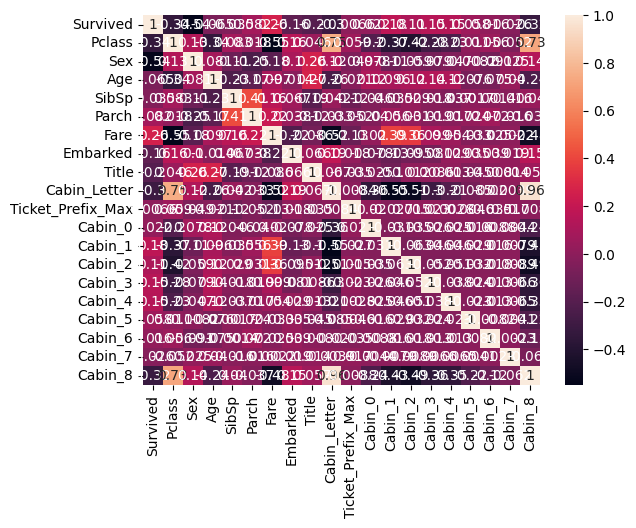

In [43]:
cabin_dummies = pd.get_dummies(data_xgb['Cabin_Letter'], prefix='Cabin', drop_first=False)

data_xgb = pd.concat([data_xgb, cabin_dummies], axis=1)

corr_matrix = data_xgb.corr()
sns.heatmap(corr_matrix, annot=True)

In [44]:
from sklearn.model_selection import train_test_split

# Define features and target
X_xgb = data_xgb.drop('Survived', axis=1)
y = data_xgb['Survived']

# Split data (for final evaluation after GridSearchCV)
X_train_xgb, X_test_xgb, y_train, y_test = train_test_split(X_xgb, y, test_size=0.2, random_state=42)


from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define parameter grid
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available CPU cores
    verbose=1
)

# Fit GridSearchCV on training data
grid_search_xgb.fit(X_train_xgb, y_train)

# Best parameters and score
print(f"Best Parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_xgb.best_score_:.4f}")

# Evaluate on test set with best model
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_xgb)
print(f"XGBoost Test Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\naren\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [10:35:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best Cross-Validation Accuracy: 0.8371
XGBoost Test Accuracy: 0.7989
